In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(color_codes=True)
import numpy as np

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### EDA using visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='forecast_price_energy_off_peak'>

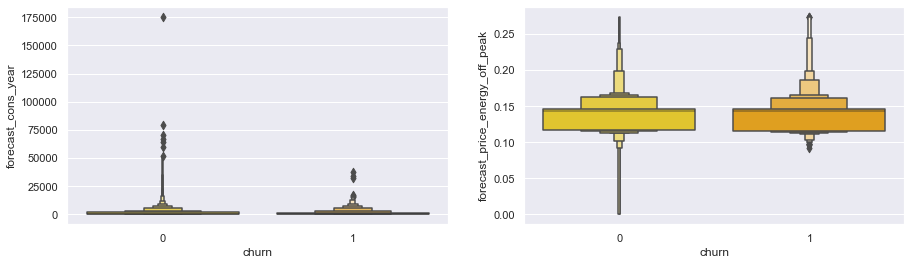

In [27]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxenplot(client_df['churn'], client_df['forecast_cons_year'], palette = 'Wistia')

plt.subplot(1, 2, 2)
sns.boxenplot(client_df['churn'], client_df['forecast_price_energy_off_peak'], palette = 'Wistia')

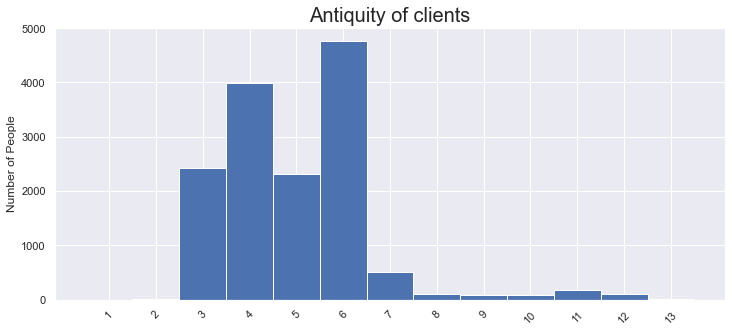

In [30]:
N = len(client_df['num_years_antig'].unique())
DataCounts = client_df['num_years_antig'].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width, color='b')
axs.set_ylabel('Number of People')
axs.set_title('Antiquity of clients', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='cons_last_month'>

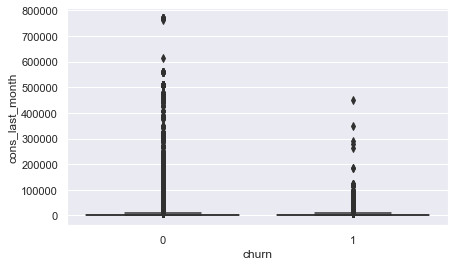

In [31]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(client_df['churn'], client_df['cons_last_month'], palette = 'magma')

In [5]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

In [6]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [8]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()

In [9]:
churn_total

,Companies
churn,
0,13187
1,1419


In [12]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [13]:
channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


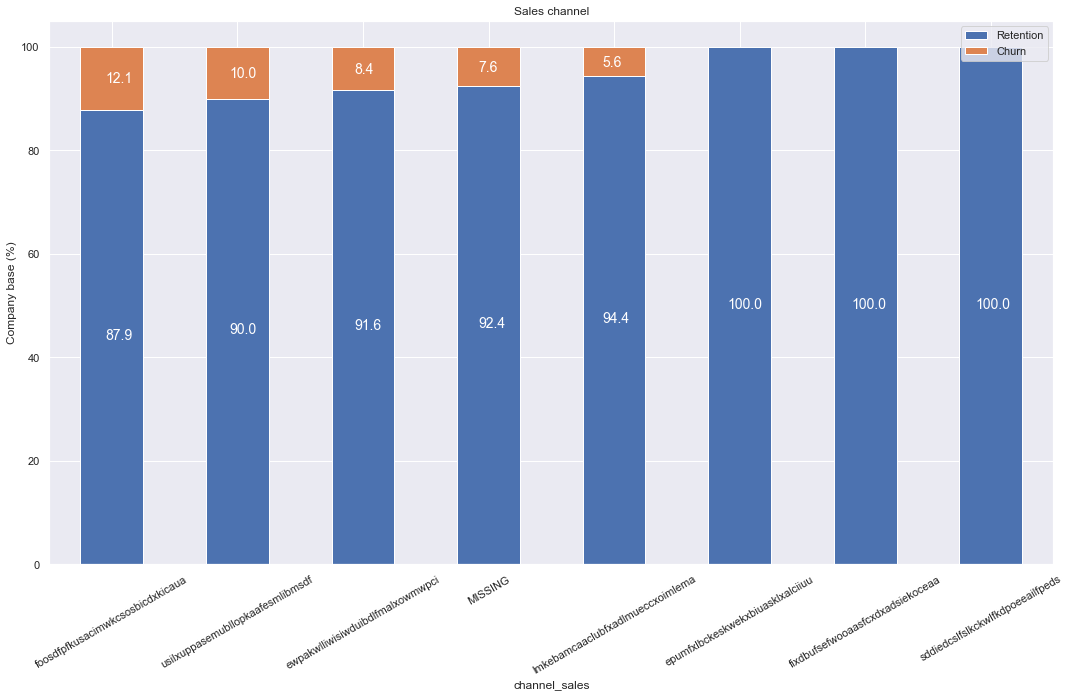

In [14]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

We can see that certain companies have no churn whereas others have around 10-12% churn. It would interesting to focus on those companies later.

In [15]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [16]:
consumption

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0
...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,32270,47940,0,0.00,t,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,f,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,f,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,f,0


In [22]:
def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]}) # Create a dataframe with the data to be plot
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

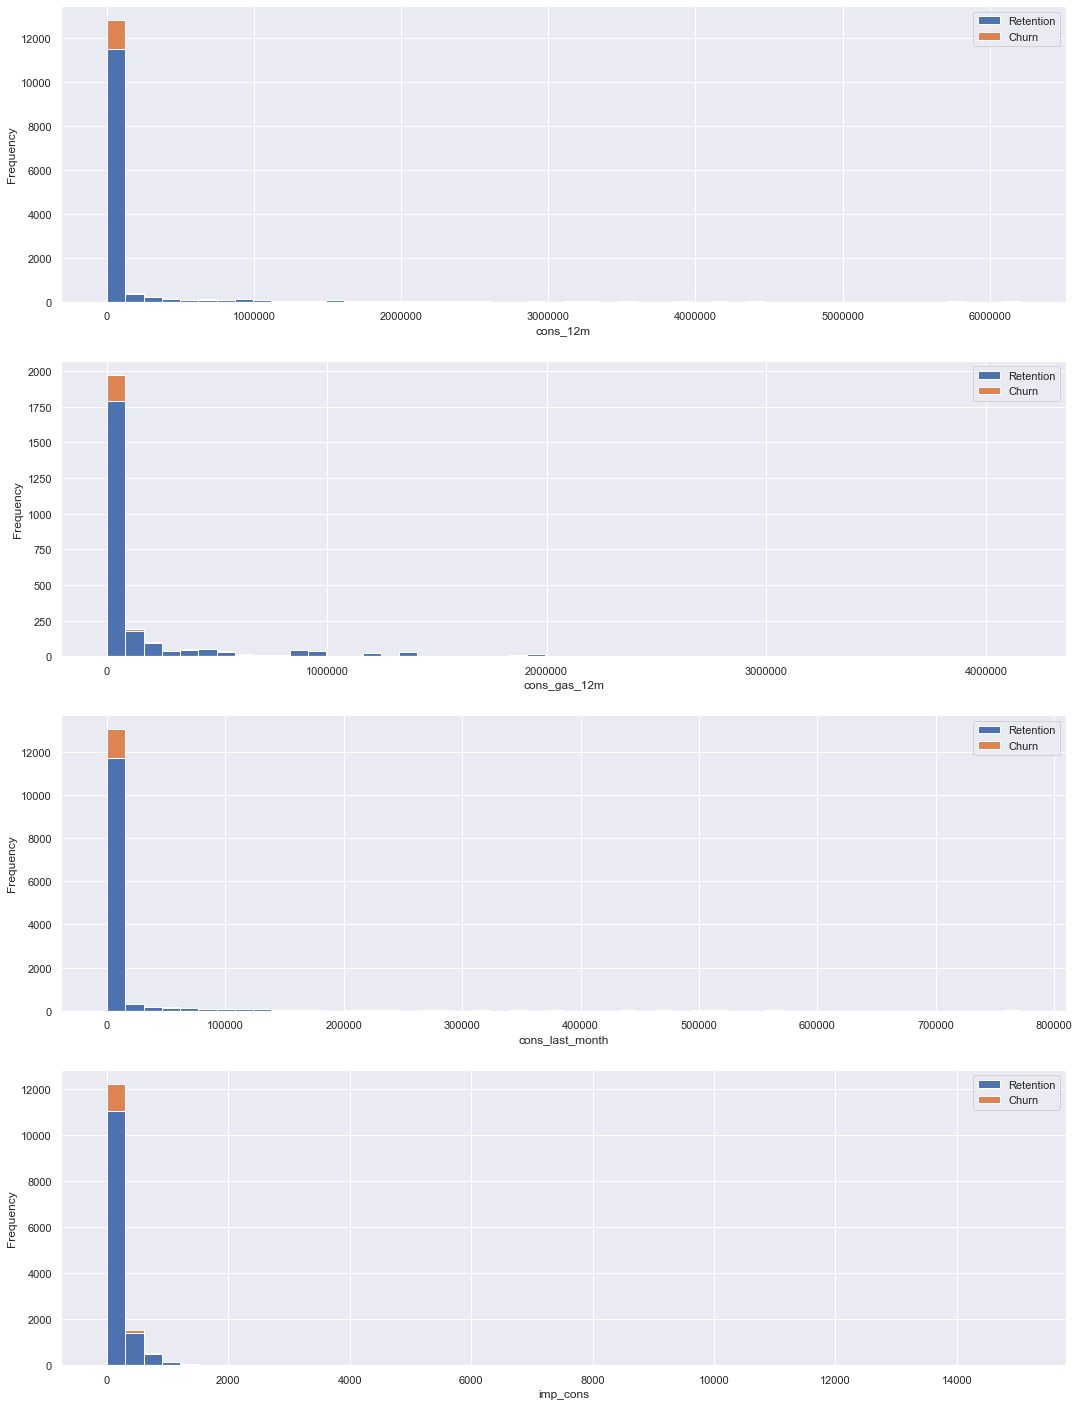

In [24]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

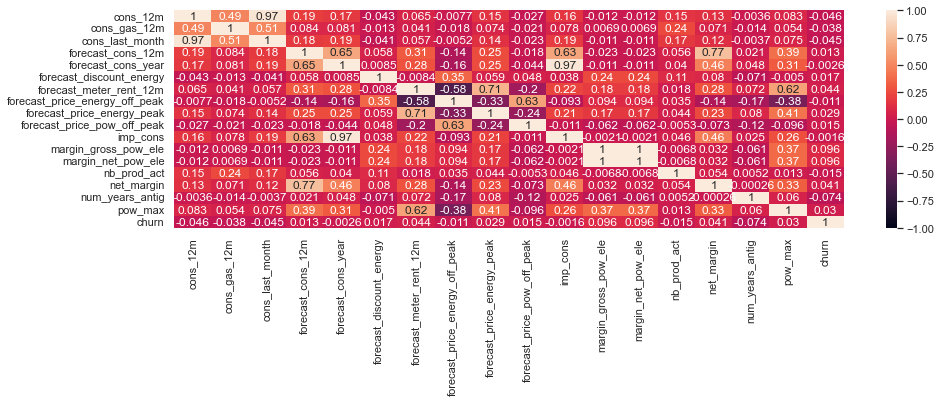

In [32]:
heatmap = sns.heatmap(client_df.corr(), vmin=-1, vmax=1, annot=True)

We can see that there is no strong correlation of any column with churn. Since we cannot derive any relationship from the availaible columns, we should create new features from existing ones.

### Finding the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

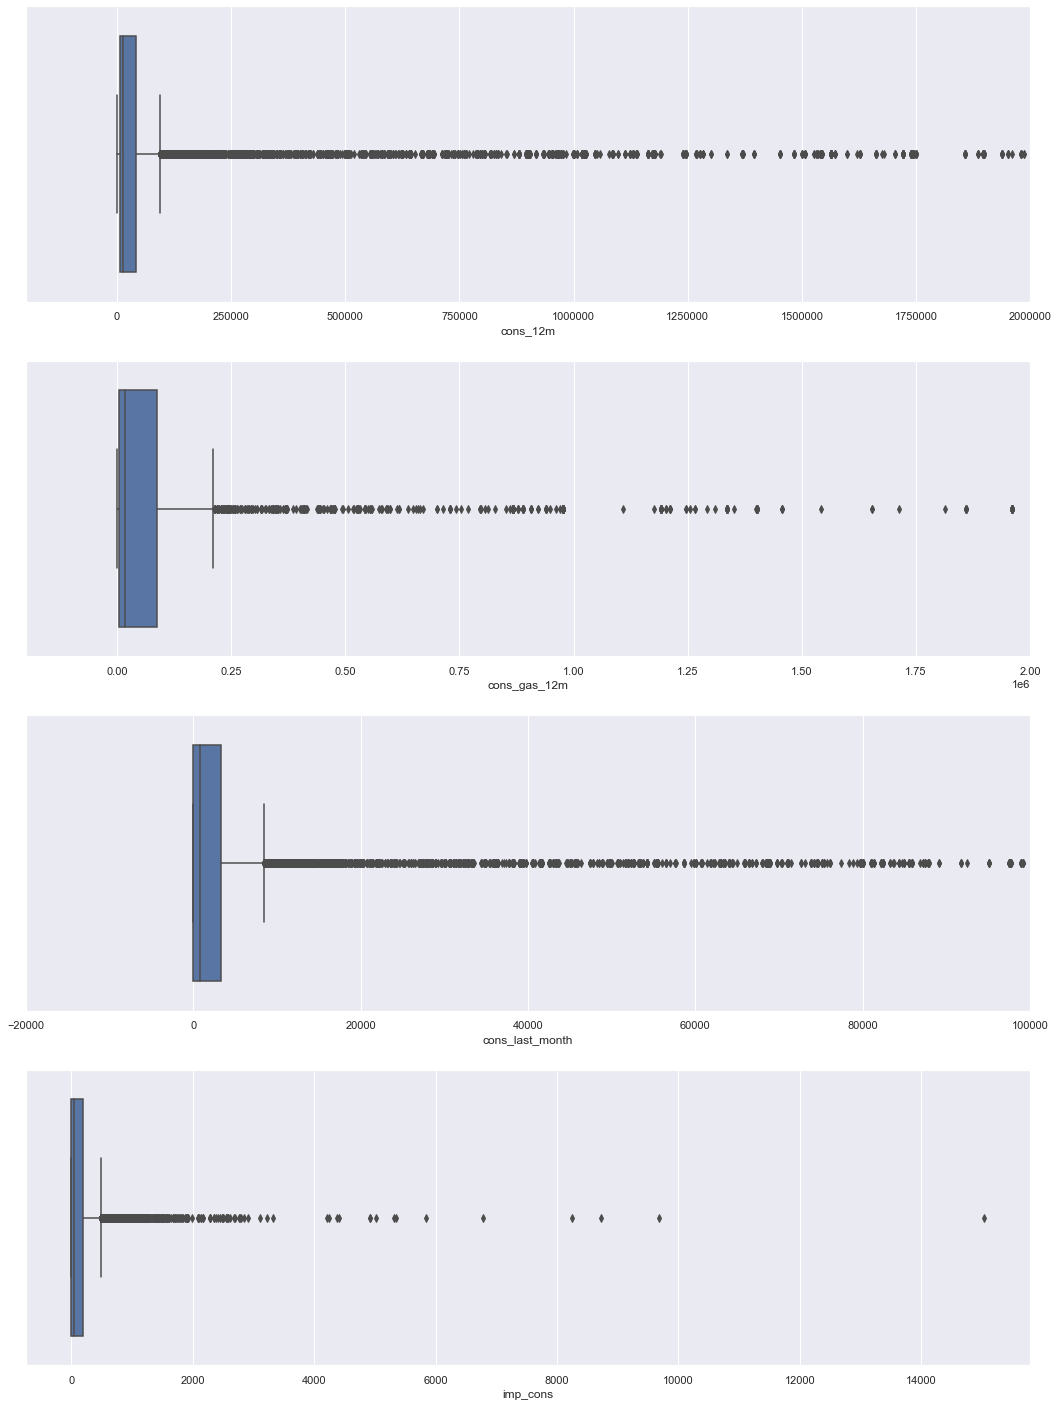

In [36]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])


for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

In [38]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m","churn"
    ]
]

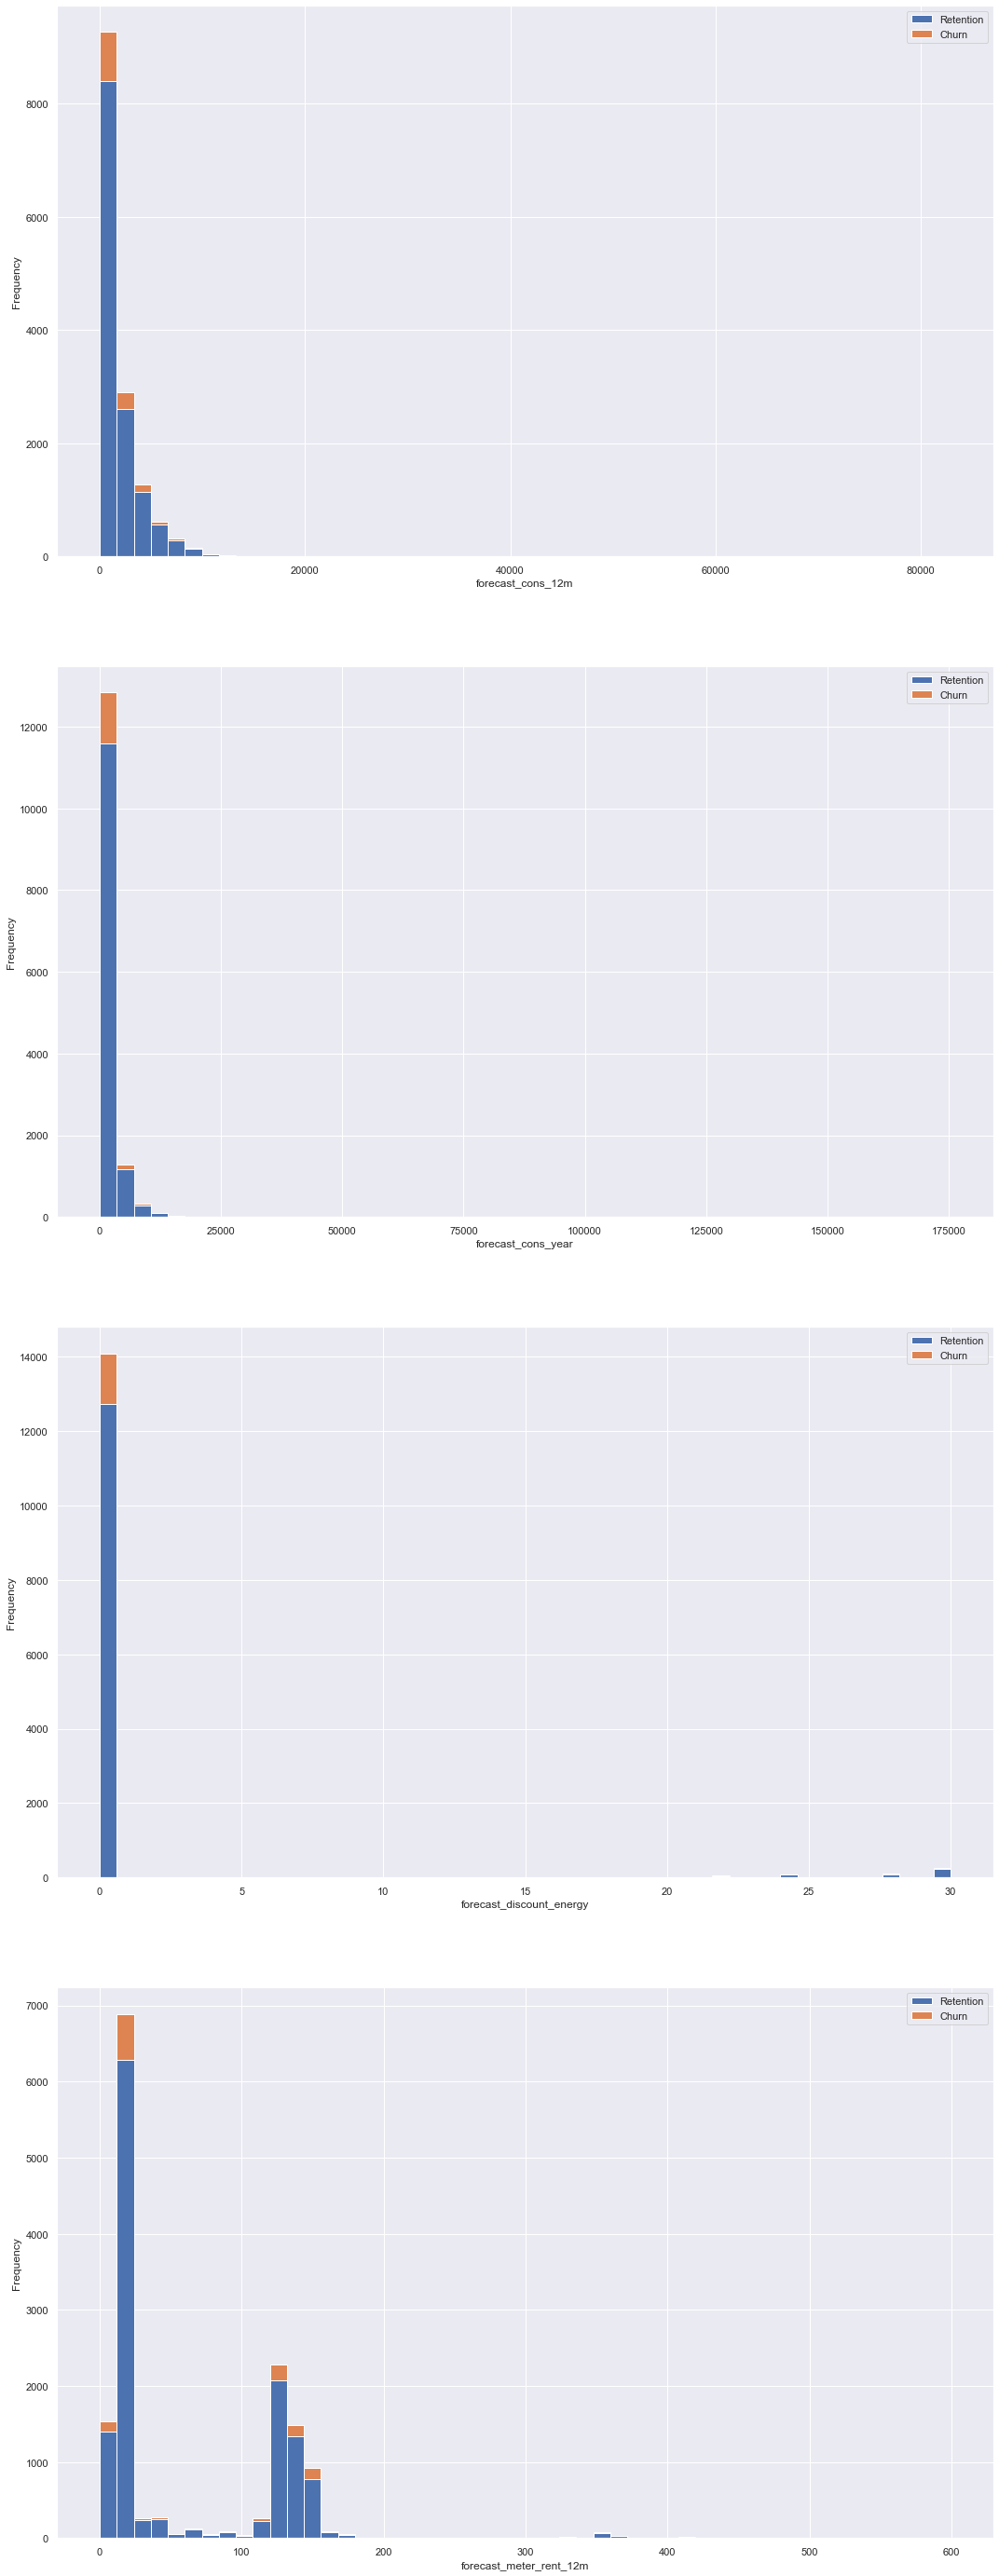

In [40]:
fig, axs = plt.subplots(nrows=4, figsize=(18,50))

plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])

In [41]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

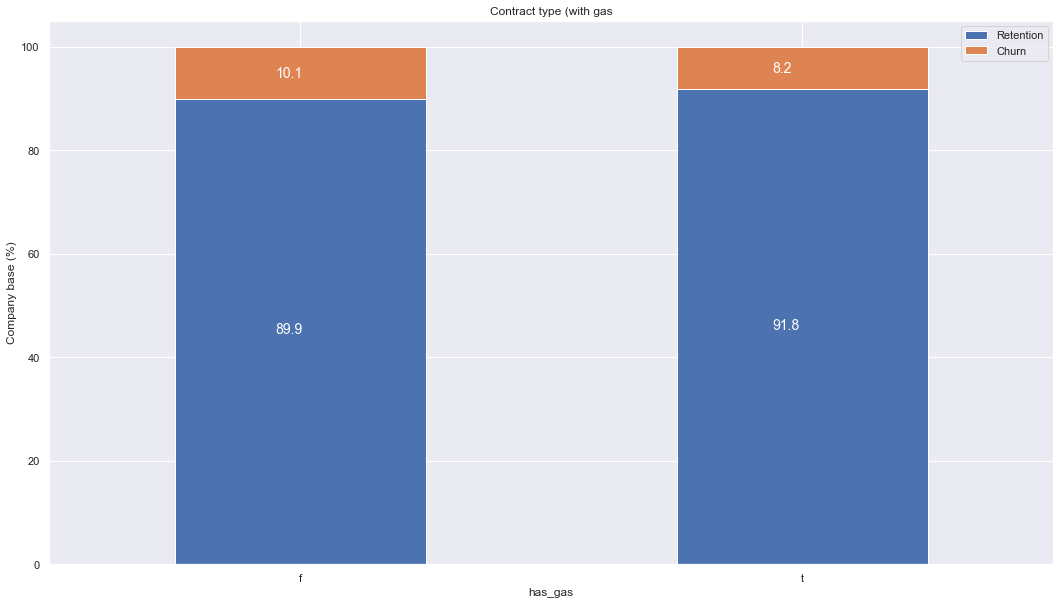

In [42]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

In [46]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

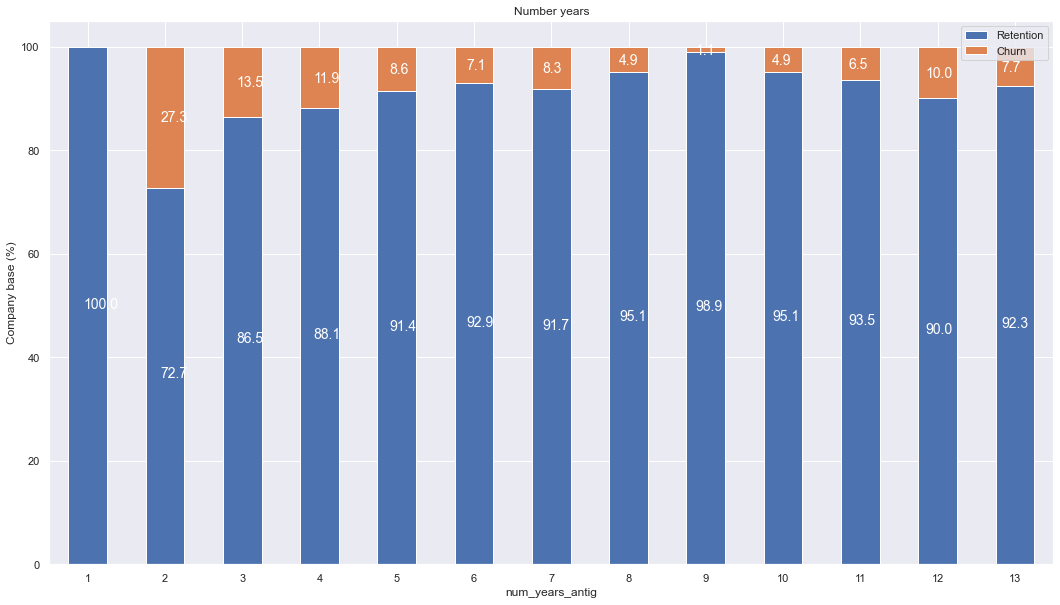

In [47]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

In [48]:
#convert to datetime
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [49]:
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [51]:
mean_year

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [52]:
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",
        "price_peak_var": "mean_year_price_p2_var",
        "price_mid_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_peak_fix": "mean_year_price_p2_fix",
        "price_mid_peak_fix": "mean_year_price_p3_fix"
    }
)

In [53]:
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [64]:
mean_year

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [65]:
mean_3m

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...
16090,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16091,fffac626da707b1b5ab11e8431a4d0a2,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


In [66]:
mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"
    }
)

In [67]:
mean_3m

,id,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...
16090,ffef185810e44254c3a4c6395e6b4d8a,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16091,fffac626da707b1b5ab11e8431a4d0a2,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969


In [74]:
mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "mean_year_price_p1_var": "mean_6m_price_p1_var",
        "mean_year_price_p2_var": "mean_6m_price_p2_var",
        "mean_year_price_p3_var": "mean_6m_price_p3_var",
        "mean_year_price_p1_fix": "mean_6m_price_p1_fix",
        "mean_year_price_p2_fix": "mean_6m_price_p2_fix",
        "mean_year_price_p3_fix": "mean_6m_price_p3_fix"
    }
)

In [75]:
mean_6m

,id,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555
16092,fffac626da707b1b5ab11e8431a4d0a2,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969


In [76]:
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [77]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [78]:
price_features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.291555,40.843313,24.533410,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,...,16.291555,40.842733,24.532829,16.360393,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555
16091,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,...,0.000000,44.501269,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,...,16.791555,41.381645,25.064896,16.882958,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,...,16.258969,40.767579,24.490024,16.332952,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555


In [79]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,0


<AxesSubplot:>

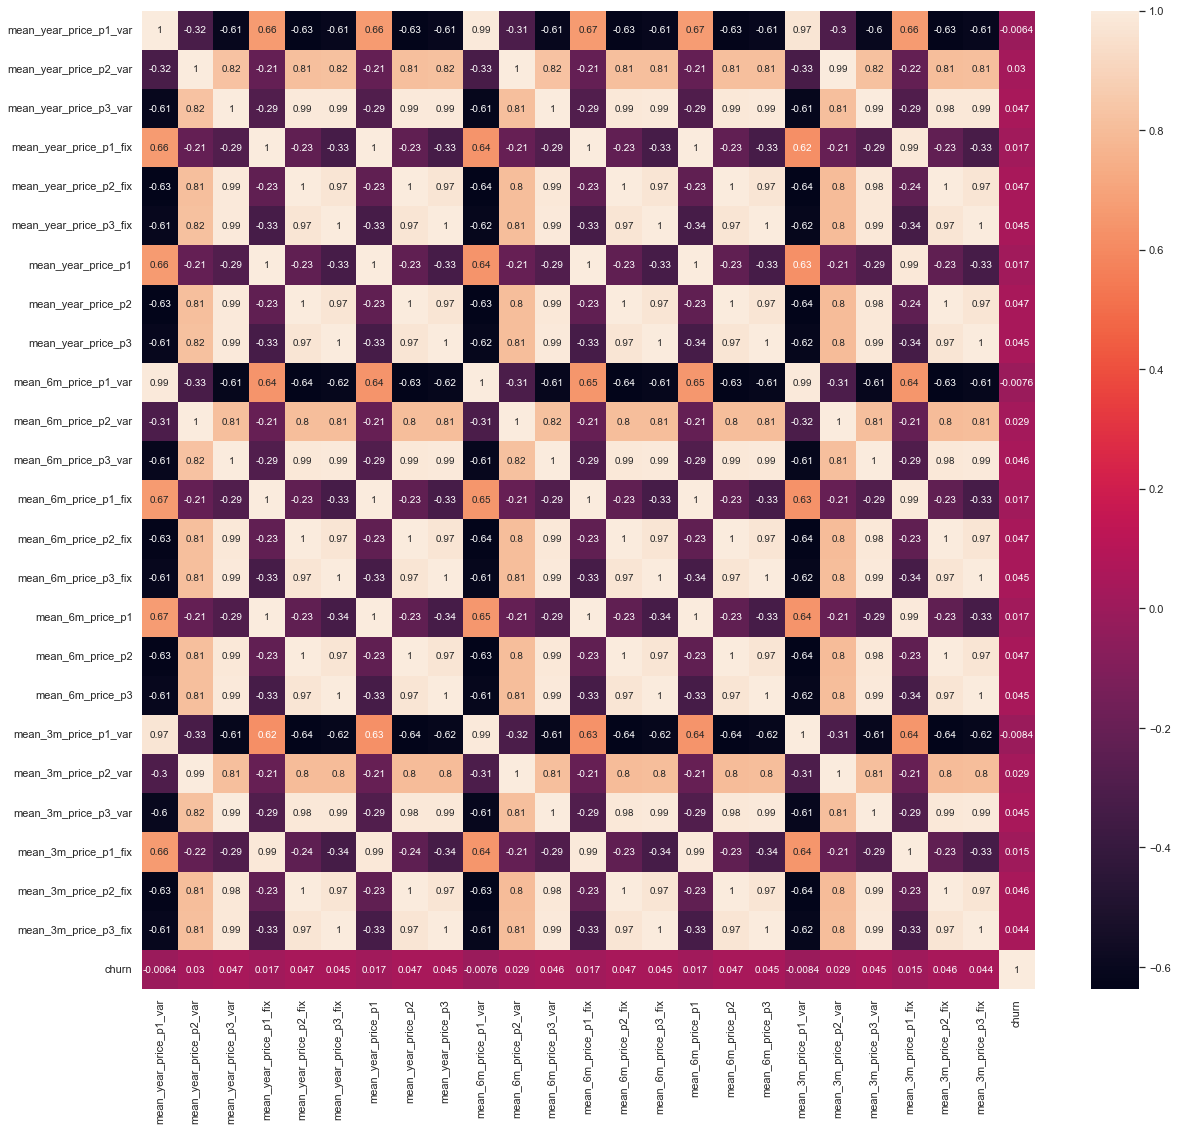

In [80]:
corr = price_analysis.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

We still cannot make any strong support for the hypothesis that price sensitivity and churn are related.

In [81]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [82]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,0


In [83]:
merged_data.to_csv('clean_data_after_eda.csv')